# Document Splitting

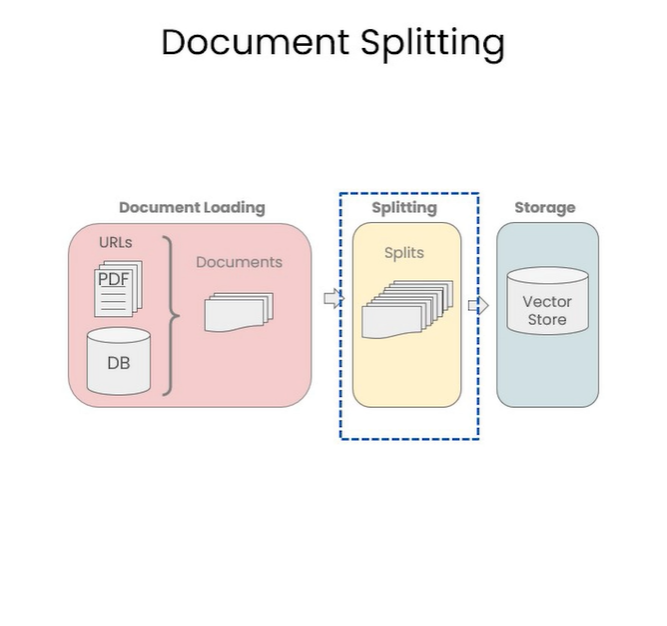

**Chunklara bölme** işlemi token size a veya karakter sayısına göre yapılırsa fotoğrafta örneği gösterilen şekilde önemli bilgilerin kaybedilmesine sebep olabilir.


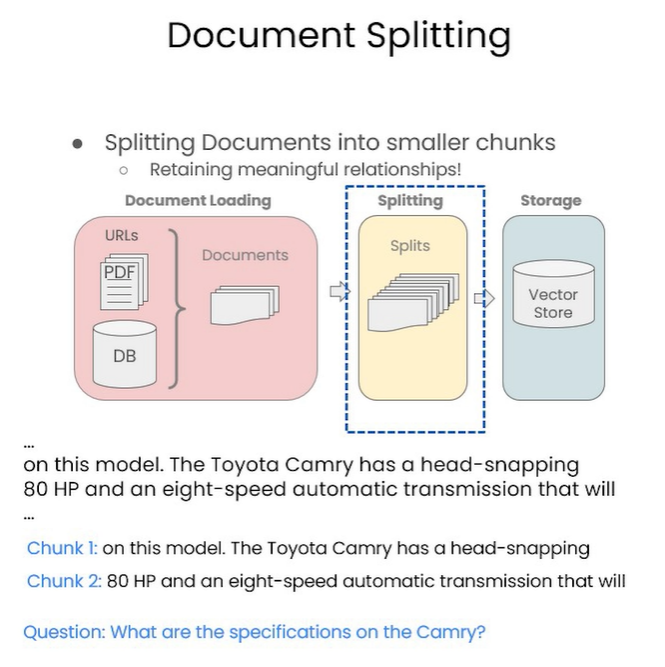

In [1]:
import os
import openai
import sys
sys.path.append('../..')

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

In [2]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

In [18]:
chunk_size =26
chunk_overlap = 4

In [10]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

Bu neden aşağıdaki dizeyi bölmüyor?
- `chunk_size`>=`text_size` sebebiyle tek chunk var 

In [19]:
text1 = 'abcdefghijklmnopqrstuvwxyz'

In [20]:
r_splitter.split_text(text1)

['abcdefghijklmnopqrstuvwxyz']

In [21]:
text2 = 'abcdefghijklmnopqrstuvwxyzabcdefg'

In [22]:
r_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyz', 'vwxyzabcdefg']

Tamam, bu dizeyi bölüyor ama 4 olarak belirtilen bir örtüşme var, ama 3 gibi görünüyor? (çift sayı deneyin)

In [23]:
text3 = "a b c d e f g h i j k l m n o p q r s t u v w x y z"

In [24]:
r_splitter.split_text(text3)

['a b c d e f g h i j k l m', 'l m n o p q r s t u v w x', 'w x y z']

In [25]:
c_splitter.split_text(text3)

['a b c d e f g h i j k l m n o p q r s t u v w x y z']

In [26]:
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separator = ' '
)
c_splitter.split_text(text3)

['a b c d e f g h i j k l m', 'l m n o p q r s t u v w x', 'w x y z']

Kendi örneklerinizi deneyin!

## Recursive splitting detayları

Genel metinler için `RecursiveCharacterTextSplitter` önerilir.

In [27]:
some_text = """When writing documents, writers will use document structure to group content. \
This can convey to the reader, which idea's are related. For example, closely related ideas \
are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n  \
Paragraphs are often delimited with a carriage return or two carriage returns. \
Carriage returns are the "backslash n" you see embedded in this string. \
Sentences have a period at the end, but also, have a space.\
and words are separated by space."""

In [28]:
len(some_text)

496

In [29]:
c_splitter = CharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0,
    separator = ' '
)
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0, 
    separators=["\n\n", "\n", " ", ""]
)

In [30]:
c_splitter.split_text(some_text)

['When writing documents, writers will use document structure to group content. This can convey to the reader, which idea\'s are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also,',
 'have a space.and words are separated by space.']

In [31]:
r_splitter.split_text(some_text)

["When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.",
 'Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also, have a space.and words are separated by space.']

Yığın boyutunu biraz küçültelim ve ayırıcılarımıza bir nokta ekleyelim:

In [32]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150,
    chunk_overlap=0,
    separators=["\n\n", "\n", "\. ", " ", ""]
)
r_splitter.split_text(some_text)

["When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related",
 '. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.',
 'Paragraphs are often delimited with a carriage return or two carriage returns',
 '. Carriage returns are the "backslash n" you see embedded in this string',
 '. Sentences have a period at the end, but also, have a space.and words are separated by space.']

In [33]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150,
    chunk_overlap=0,
    separators=["\n\n", "\n", "(?<=\. )", " ", ""]
)
r_splitter.split_text(some_text)

["When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related.",
 'For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.',
 'Paragraphs are often delimited with a carriage return or two carriage returns.',
 'Carriage returns are the "backslash n" you see embedded in this string.',
 'Sentences have a period at the end, but also, have a space.and words are separated by space.']

In [36]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("docs/MachineLearning-Lecture01.pdf")
pages = loader.load()

In [37]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=1000,
    chunk_overlap=150,
    length_function=len
)

In [38]:
docs = text_splitter.split_documents(pages)

In [39]:
len(docs)

77

In [40]:
len(pages)

22

In [ ]:
from langchain.document_loaders import NotionDirectoryLoader
loader = NotionDirectoryLoader("docs/Notion_DB")
notion_db = loader.load()

In [ ]:
docs = text_splitter.split_documents(notion_db)

In [ ]:
len(notion_db)

In [ ]:
len(docs)

## Token splitting

İstersek token sayısına göre de bölebiliriz.

Bu yararlı olabilir çünkü LLM'ler genellikle belirteçlerle belirlenmiş bağlam pencerelerine sahiptir.

Jetonlar genellikle ~4 karakterdir.

In [41]:
from langchain.text_splitter import TokenTextSplitter

In [42]:
text_splitter = TokenTextSplitter(chunk_size=1, chunk_overlap=0)

In [43]:
text1 = "foo bar bazzyfoo"

In [44]:
text_splitter.split_text(text1)

['foo', ' bar', ' b', 'az', 'zy', 'foo']

In [45]:
text_splitter = TokenTextSplitter(chunk_size=10, chunk_overlap=0)

In [46]:
docs = text_splitter.split_documents(pages)

In [47]:
docs[0]

Document(page_content='MachineLearning-Lecture01  \n', metadata={'source': 'docs/MachineLearning-Lecture01.pdf', 'page': 0})

In [48]:
pages[0].metadata

{'source': 'docs/MachineLearning-Lecture01.pdf', 'page': 0}

## Context aware splitting

Parçalama, ortak bağlama sahip metinleri bir arada tutmayı amaçlar.

Bir metin bölme, ilgili metni bir arada tutmak için genellikle cümleler veya diğer sınırlayıcıları kullanır, ancak birçok belge (Markdown gibi) bölmede açıkça kullanılabilecek yapıya (başlıklar) sahiptir.

Aşağıda gösterildiği gibi, başlık meta verilerini parçalarımızda korumak için `MarkdownHeaderTextSplitter`'ı kullanabiliriz.

In [50]:
from langchain.document_loaders import NotionDirectoryLoader
from langchain.text_splitter import MarkdownHeaderTextSplitter

In [52]:
markdown_document = """# Title\n\n \
## Chapter 1\n\n \
Hi this is Jim\n\n Hi this is Joe\n\n \
### Section \n\n \
Hi this is Lance \n\n 
## Chapter 2\n\n \
Hi this is Molly"""

In [53]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

In [54]:
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)
md_header_splits = markdown_splitter.split_text(markdown_document)

In [55]:
md_header_splits[0]

Document(page_content='Hi this is Jim  \nHi this is Joe', metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1'})

In [56]:
md_header_splits[1]

Document(page_content='Hi this is Lance', metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1', 'Header 3': 'Section'})

Notion veritabanı gibi gerçek bir Markdown dosyası üzerinde deneyin.

In [ ]:
loader = NotionDirectoryLoader("docs/Notion_DB")
docs = loader.load()
txt = ' '.join([d.page_content for d in docs])

In [ ]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
]
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)

In [ ]:
md_header_splits = markdown_splitter.split_text(txt)

In [ ]:
md_header_splits[0]